In [1]:
import pandas as pd, matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv('소비자물가지수.csv')
df

,통계표,계정항목,단위,가중치,변환,2014/01,2014/02,2014/03,2014/04,2014/05,...,2024/04,2024/05,2024/06,2024/07,2024/08,2024/09,2024/10,2024/11,2024/12,2025/01
0,4.2.1. 소비자물가지수,총지수,2020=100,1000.0,원자료,93.730,93.980,94.153,94.214,94.369,...,114.01,114.10,113.84,114.13,114.54,114.65,114.69,114.40,114.91,115.71
1,4.2.1. 소비자물가지수,식료품 및 비주류음료,2020=100,142.0,원자료,85.705,86.581,86.810,86.733,86.741,...,122.75,121.90,120.68,121.54,122.99,124.72,124.53,121.32,123.61,125.13
2,4.2.1. 소비자물가지수,식료품,2020=100,132.3,원자료,85.143,86.074,86.256,86.203,86.165,...,123.06,122.10,120.91,121.57,123.16,125.05,124.74,121.24,123.52,125.02
3,4.2.1. 소비자물가지수,빵 및 곡물,2020=100,22.3,원자료,87.809,88.665,88.473,88.547,88.480,...,117.96,118.59,118.72,118.53,118.27,117.88,119.01,119.44,121.15,121.33
4,4.2.1. 소비자물가지수,쌀,2020=100,4.2,원자료,87.742,87.728,87.212,87.205,86.641,...,97.65,100.38,100.55,100.35,98.78,98.35,99.18,99.88,99.38,98.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,4.2.1. 소비자물가지수,부동산중개수수료,2020=100,0.8,원자료,103.305,103.305,103.305,103.305,103.305,...,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28
577,4.2.1. 소비자물가지수,행정수수료,2020=100,1.1,원자료,100.000,100.000,100.000,100.000,100.000,...,100.00,100.00,100.00,98.67,98.67,98.67,98.67,98.67,98.67,98.67
578,4.2.1. 소비자물가지수,대입전형료,2020=100,0.1,원자료,116.808,116.808,116.808,116.808,116.808,...,101.03,101.03,101.03,101.03,101.03,94.03,94.03,94.03,94.03,93.36
579,4.2.1. 소비자물가지수,시험응시료,2020=100,0.4,원자료,84.324,84.324,84.324,89.419,89.419,...,111.37,111.37,116.10,116.10,116.10,116.10,116.10,116.10,116.10,116.10


In [3]:
df.drop(['통계표', '단위','가중치', '변환'], axis=1, inplace=True)
df

,계정항목,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,...,2024/04,2024/05,2024/06,2024/07,2024/08,2024/09,2024/10,2024/11,2024/12,2025/01
0,총지수,93.730,93.980,94.153,94.214,94.369,94.248,94.386,94.551,94.490,...,114.01,114.10,113.84,114.13,114.54,114.65,114.69,114.40,114.91,115.71
1,식료품 및 비주류음료,85.705,86.581,86.810,86.733,86.741,86.360,86.635,87.336,87.914,...,122.75,121.90,120.68,121.54,122.99,124.72,124.53,121.32,123.61,125.13
2,식료품,85.143,86.074,86.256,86.203,86.165,85.756,86.044,86.794,87.430,...,123.06,122.10,120.91,121.57,123.16,125.05,124.74,121.24,123.52,125.02
3,빵 및 곡물,87.809,88.665,88.473,88.547,88.480,88.267,87.934,88.119,88.296,...,117.96,118.59,118.72,118.53,118.27,117.88,119.01,119.44,121.15,121.33
4,쌀,87.742,87.728,87.212,87.205,86.641,86.600,86.365,86.042,85.988,...,97.65,100.38,100.55,100.35,98.78,98.35,99.18,99.88,99.38,98.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,부동산중개수수료,103.305,103.305,103.305,103.305,103.305,103.305,103.305,103.305,103.305,...,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28
577,행정수수료,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.00,100.00,100.00,98.67,98.67,98.67,98.67,98.67,98.67,98.67
578,대입전형료,116.808,116.808,116.808,116.808,116.808,116.808,116.808,116.808,116.808,...,101.03,101.03,101.03,101.03,101.03,94.03,94.03,94.03,94.03,93.36
579,시험응시료,84.324,84.324,84.324,89.419,89.419,90.305,90.305,90.305,90.305,...,111.37,111.37,116.10,116.10,116.10,116.10,116.10,116.10,116.10,116.10


In [4]:
df.columns = df.columns.str.replace('/', '-')

In [5]:
df.columns = [df.columns[0]] + list(pd.to_datetime(df.columns[1:]))

In [6]:
df

,계정항목,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,...,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00
0,총지수,93.730,93.980,94.153,94.214,94.369,94.248,94.386,94.551,94.490,...,114.01,114.10,113.84,114.13,114.54,114.65,114.69,114.40,114.91,115.71
1,식료품 및 비주류음료,85.705,86.581,86.810,86.733,86.741,86.360,86.635,87.336,87.914,...,122.75,121.90,120.68,121.54,122.99,124.72,124.53,121.32,123.61,125.13
2,식료품,85.143,86.074,86.256,86.203,86.165,85.756,86.044,86.794,87.430,...,123.06,122.10,120.91,121.57,123.16,125.05,124.74,121.24,123.52,125.02
3,빵 및 곡물,87.809,88.665,88.473,88.547,88.480,88.267,87.934,88.119,88.296,...,117.96,118.59,118.72,118.53,118.27,117.88,119.01,119.44,121.15,121.33
4,쌀,87.742,87.728,87.212,87.205,86.641,86.600,86.365,86.042,85.988,...,97.65,100.38,100.55,100.35,98.78,98.35,99.18,99.88,99.38,98.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,부동산중개수수료,103.305,103.305,103.305,103.305,103.305,103.305,103.305,103.305,103.305,...,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28,92.28
577,행정수수료,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.00,100.00,100.00,98.67,98.67,98.67,98.67,98.67,98.67,98.67
578,대입전형료,116.808,116.808,116.808,116.808,116.808,116.808,116.808,116.808,116.808,...,101.03,101.03,101.03,101.03,101.03,94.03,94.03,94.03,94.03,93.36
579,시험응시료,84.324,84.324,84.324,89.419,89.419,90.305,90.305,90.305,90.305,...,111.37,111.37,116.10,116.10,116.10,116.10,116.10,116.10,116.10,116.10


In [7]:
df.iloc[0, :]

계정항목                      총지수
2014-01-01 00:00:00     93.73
2014-02-01 00:00:00     93.98
2014-03-01 00:00:00    94.153
2014-04-01 00:00:00    94.214
                        ...  
2024-09-01 00:00:00    114.65
2024-10-01 00:00:00    114.69
2024-11-01 00:00:00     114.4
2024-12-01 00:00:00    114.91
2025-01-01 00:00:00    115.71
Name: 0, Length: 134, dtype: object

In [8]:
df = df.transpose().reset_index()

In [9]:
df

,index,0,1,2,3,4,5,6,7,8,...,571,572,573,574,575,576,577,578,579,580
0,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
1,2014-01-01 00:00:00,93.73,85.705,85.143,87.809,87.742,NaN,86.922,107.76,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
2,2014-02-01 00:00:00,93.98,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
3,2014-03-01 00:00:00,94.153,86.81,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
4,2014-04-01 00:00:00,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2024-09-01 00:00:00,114.65,124.72,125.05,117.88,98.35,104.13,101.39,142.69,105.67,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.44
130,2024-10-01 00:00:00,114.69,124.53,124.74,119.01,99.18,104.0,101.34,143.84,105.71,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.51
131,2024-11-01 00:00:00,114.4,121.32,121.24,119.44,99.88,105.28,104.69,149.16,105.82,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.51
132,2024-12-01 00:00:00,114.91,123.61,123.52,121.15,99.38,108.51,111.3,158.42,106.63,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.58


In [10]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [11]:
df

,계정항목,총지수,식료품 및 비주류음료,식료품,빵 및 곡물,쌀,현미,찹쌀,보리쌀,콩,...,보육시설이용료,요양시설이용료,보험서비스료,자동차보험료,금융수수료,부동산중개수수료,행정수수료,대입전형료,시험응시료,장례비
0,2014-01-01 00:00:00,93.73,85.705,85.143,87.809,87.742,NaN,86.922,107.76,83.926,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.836
1,2014-02-01 00:00:00,93.98,86.581,86.074,88.665,87.728,NaN,86.846,108.985,83.679,...,91.716,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.896
2,2014-03-01 00:00:00,94.153,86.81,86.256,88.473,87.212,NaN,86.959,110.481,82.455,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,84.324,91.999
3,2014-04-01 00:00:00,94.214,86.733,86.203,88.547,87.205,NaN,86.751,111.633,81.994,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,92.112
4,2014-05-01 00:00:00,94.369,86.741,86.165,88.48,86.641,NaN,86.286,112.417,80.851,...,99.141,74.892,NaN,90.137,100.09,103.305,100.0,116.808,89.419,91.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-09-01 00:00:00,114.65,124.72,125.05,117.88,98.35,104.13,101.39,142.69,105.67,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.44
129,2024-10-01 00:00:00,114.69,124.53,124.74,119.01,99.18,104.0,101.34,143.84,105.71,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.51
130,2024-11-01 00:00:00,114.4,121.32,121.24,119.44,99.88,105.28,104.69,149.16,105.82,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.51
131,2024-12-01 00:00:00,114.91,123.61,123.52,121.15,99.38,108.51,111.3,158.42,106.63,...,88.86,112.87,163.55,94.45,100.0,92.28,98.67,94.03,116.1,108.58


In [20]:
df_1 = df[['계정항목', '총지수']] # 총지수 자리는 입력 받기

In [21]:
df_1.columns = ['ds', 'y']

In [ ]:
model = Prophet() # 매번 새로운 모델. -> py 파일에서 선언해줄 것

In [23]:
model.fit(df_1)

03:27:21 - cmdstanpy - INFO - Chain [1] start processing
03:27:21 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = model.make_future_dataframe(periods=36, freq='M')

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [25]:
future

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
164,2027-08-31
165,2027-09-30
166,2027-10-31
167,2027-11-30


In [26]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,93.896119,93.521565,94.216320,93.896119,93.896119,-0.011497,-0.011497,-0.011497,-0.011497,-0.011497,-0.011497,0.0,0.0,0.0,93.884623
1,2014-02-01,93.951844,93.787177,94.501300,93.951844,93.951844,0.177706,0.177706,0.177706,0.177706,0.177706,0.177706,0.0,0.0,0.0,94.129549
2,2014-03-01,94.002175,93.719912,94.419408,94.002175,94.002175,0.059570,0.059570,0.059570,0.059570,0.059570,0.059570,0.0,0.0,0.0,94.061746
3,2014-04-01,94.057899,93.795109,94.492613,94.057899,94.057899,0.078566,0.078566,0.078566,0.078566,0.078566,0.078566,0.0,0.0,0.0,94.136466
4,2014-05-01,94.111826,93.888557,94.612708,94.111826,94.111826,0.129252,0.129252,0.129252,0.129252,0.129252,0.129252,0.0,0.0,0.0,94.241078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2027-08-31,123.235360,119.600030,126.532446,119.793975,126.690278,-0.233216,-0.233216,-0.233216,-0.233216,-0.233216,-0.233216,0.0,0.0,0.0,123.002144
165,2027-09-30,123.465473,120.209360,127.466966,119.842887,127.134812,0.342800,0.342800,0.342800,0.342800,0.342800,0.342800,0.0,0.0,0.0,123.808273
166,2027-10-31,123.703256,119.738521,127.179366,119.963115,127.584930,-0.291472,-0.291472,-0.291472,-0.291472,-0.291472,-0.291472,0.0,0.0,0.0,123.411784
167,2027-11-30,123.933368,119.895011,127.841561,119.971942,128.004982,-0.148095,-0.148095,-0.148095,-0.148095,-0.148095,-0.148095,0.0,0.0,0.0,123.785273


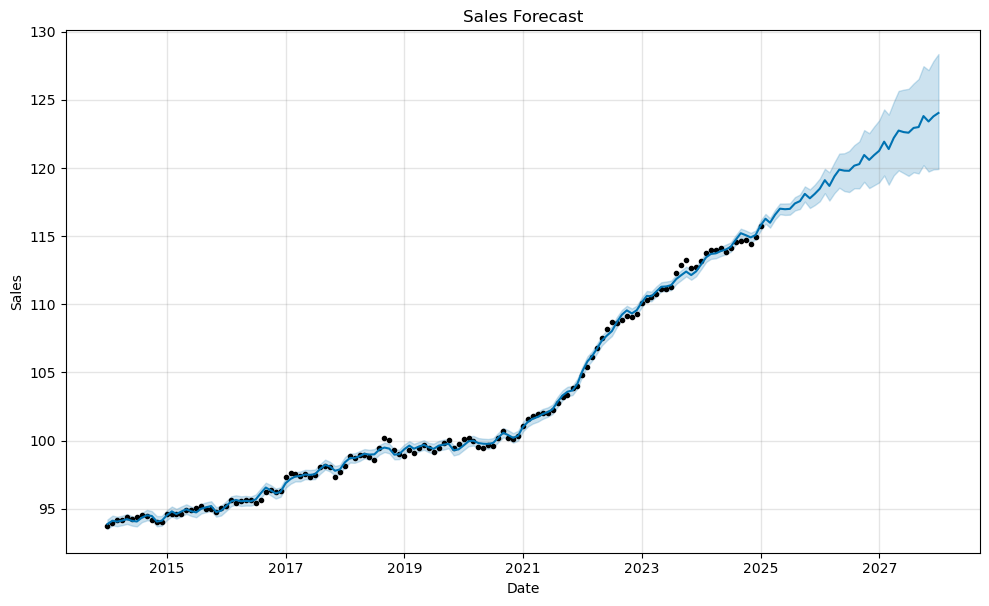

In [27]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

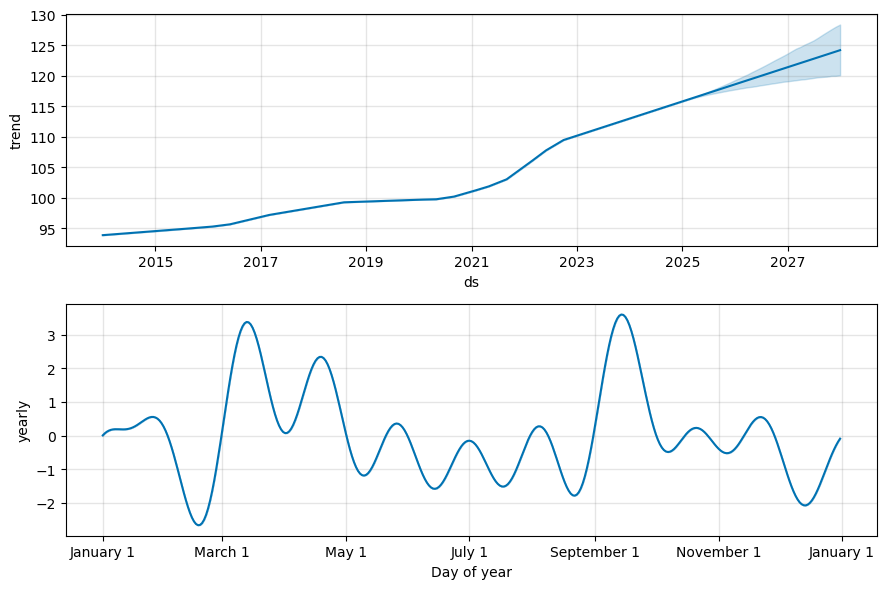

In [29]:
model.plot_components(forecast)
plt.show() # 아마 추석 연휴라 9~10월 전후해 물가 상승이 커지는 듯

In [56]:
forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0]

118.57174572073052

In [ ]:
# 현재 대비 특정 시점의 물가 상승률 (%)
(forecast.loc[forecast['ds'] == '2025-12-31', 'trend'].values[0] / df_1.iloc[df_1.index.max(), 1] - 1) * 100

2.4732051860085758